In [2]:
from __future__ import division, print_function
    
import go as go
import pandas as pd
import numpy as np
import scipy.signal as sg

import plotly as py
import plotly.graph_objs as go
import scipy.integrate as si
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from plotly import tools
from sklearn.preprocessing import normalize

In [3]:
py.offline.init_notebook_mode(connected=True)
from ipywidgets import widgets
res_levels = pd.read_csv('chennai_reservoir_levels.csv') 
rainfall = pd.read_csv('chennai_reservoir_rainfall.csv') 
res_levels.tail()
layout = go.Layout(title = 'Reservoir levels',xaxis = dict(title='Time'), yaxis = dict(title='Total Amount Water in mcft'))
data=[]
for i in ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']:
    trace = go.Scatter(x = res_levels.Date,y = res_levels.loc[:,i], name = i, mode = 'lines')
    data.append(trace)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)
data=[]

trace = go.Scatter(x = res_levels.Date,mode = 'lines')
data.append(trace)
layout = go.Layout(title = 'Rainfall data wrt each Reservoir', xaxis = dict(title='Time'), yaxis = dict(title='Total Amount of Rainfall'))
data=[]
for i in ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']:
    trace = go.Scatter(
    x = rainfall.Date, y 
    = rainfall.loc[:,i],
    name = i,
    mode = 'lines'
    )
    data.append(trace)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

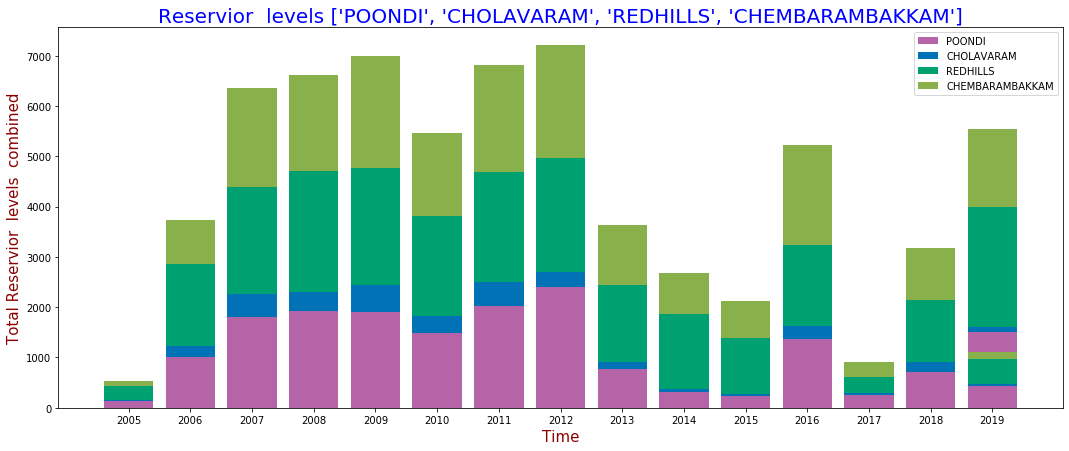

In [15]:
res_levels = pd.read_csv('chennai_reservoir_levels.csv') 
rainfall = pd.read_csv('chennai_reservoir_rainfall.csv') 
data=[]

Length = res_levels.shape
Poondi = []
Chola = []
Redhills = []
Chem = []
step = int(Length[0]/15)

x = []
    
for i in range(0, Length[0], step):
    
    Poondi.append(res_levels.loc[i:i+step,'POONDI'].mean())
    Chola.append(res_levels.loc[i:i+step,'CHOLAVARAM'].mean())
    Redhills.append(res_levels.loc[i:i+step,'REDHILLS'].mean())
    Chem.append(res_levels.loc[i:i+step,'CHEMBARAMBAKKAM'].mean())
    if(i + step<Length[0]):
        x.append(res_levels.Date[i +step][6:10])
    else:
        x.append(res_levels.Date[i][6:10])
#print(res_levels.Date[i+step-1])
x = np.array(x)
y1 = np.array(Poondi)
y2 = np.array(Chola)
y3 = np.array(Redhills)
y4 = np.array(Chem)

# plot bars in stack manner
plt.figure(figsize=(18,7))
plt.bar(x, y1, color='#b565a7')
plt.bar(x, y2, bottom=y1, color='#0072B5')
plt.bar(x, y3, bottom=y1+y2, color='#00A170')
plt.bar(x, y4, bottom=y1+y2+y3, color='#88B04B')

font1 = {'family':'sans-serif','color':'Blue','size':20}
font2 = {'family':'sans-serif','color':'darkred','size':15}

plt.title("Reservior  levels ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']", fontdict = font1)
plt.xlabel("Time", fontdict = font2)
plt.ylabel("Total Reservior  levels  combined", fontdict = font2)

plt.legend(['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'])

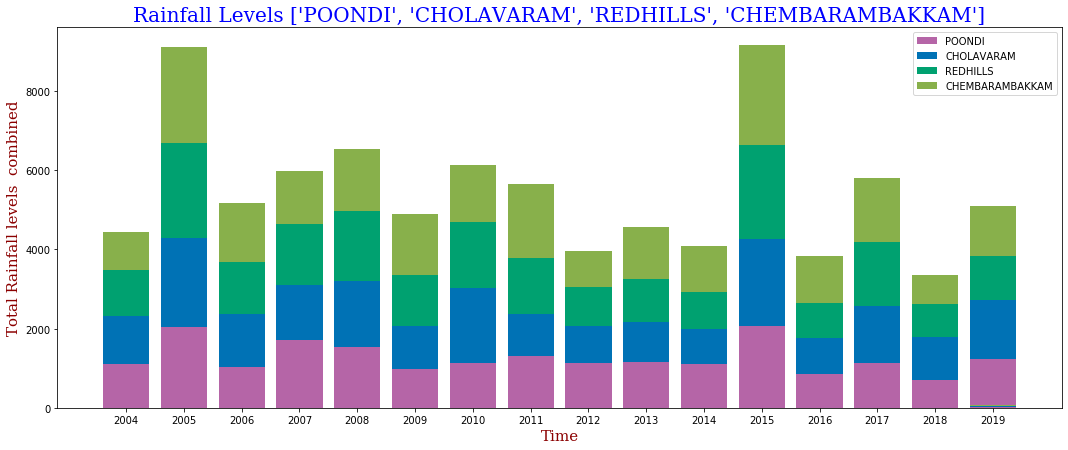

In [4]:
res_levels = pd.read_csv('chennai_reservoir_levels.csv') 
rainfall = pd.read_csv('chennai_reservoir_rainfall.csv') 
res_levels.tail()
layout = go.Layout(title = 'Reservoir levels',xaxis = dict(title='Time'), yaxis = dict(title='Total Amount Water in mcft'))
data=[]

Length = res_levels.shape
Rainfall_Poondi = []
Rainfall_Chola = []
Rainfall_Redhills = []
Rainfall_Chem = []
step = int(Length[0]/16)

Rainfall_x = []
    
for i in range(0, Length[0], step):
    
    Rainfall_Poondi.append(rainfall.loc[i:i+step,'POONDI'].sum())
    Rainfall_Chola.append(rainfall.loc[i:i+step,'CHOLAVARAM'].sum())
    Rainfall_Redhills.append(rainfall.loc[i:i+step,'REDHILLS'].sum())
    Rainfall_Chem.append(rainfall.loc[i:i+step,'CHEMBARAMBAKKAM'].sum())
    if(i + step<Length[0]):
        Rainfall_x.append(rainfall.Date[i +step][6:10])
    else:
        Rainfall_x.append(rainfall.Date[i][6:10])
x = np.array(Rainfall_x)
y1 = np.array(Rainfall_Poondi)
y2 = np.array(Rainfall_Chola)
y3 = np.array(Rainfall_Redhills)
y4 = np.array(Rainfall_Chem)

palette = sns.color_palette("Spectral", 5).as_hex()
colors = ','.join(palette)
# plot bars in stack manner
plt.figure(figsize=(18,7))
plt.bar(x, y1, color='#b565a7')
plt.bar(x, y2, bottom=y1, color='#0072B5')
plt.bar(x, y3, bottom=y1+y2, color='#00A170')
plt.bar(x, y4, bottom=y1+y2+y3, color='#88B04B')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Rainfall Levels ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']", fontdict = font1)
plt.xlabel("Time", fontdict = font2)
plt.ylabel("Total Rainfall levels  combined", fontdict = font2)

plt.legend(['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'])

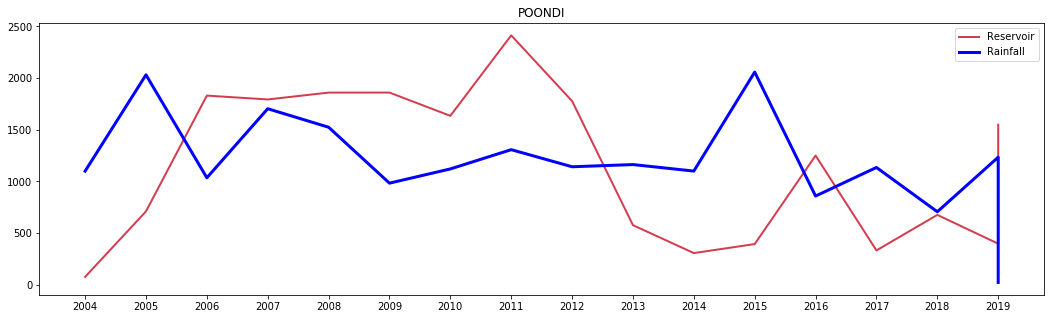

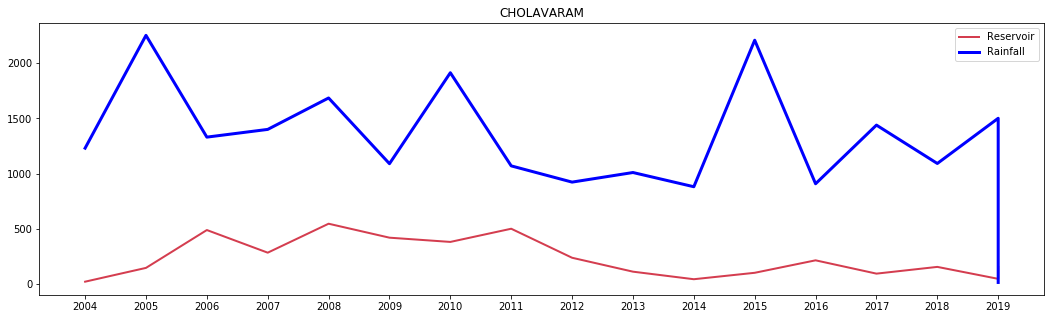

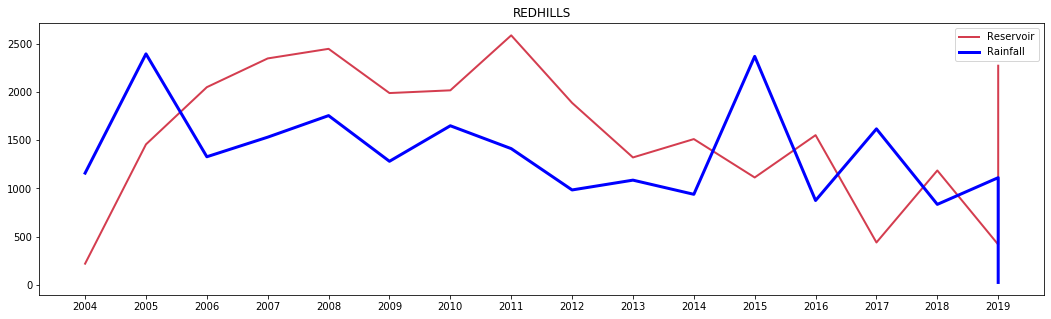

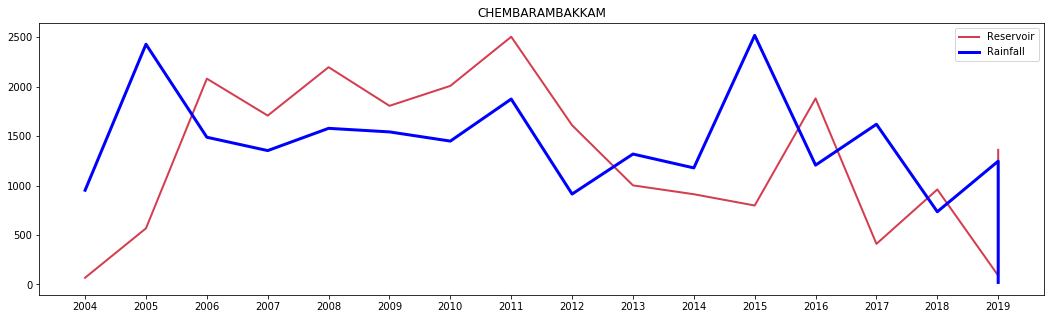

In [7]:
Places = [Poondi, Chola, Redhills, Chem]
Rainfall_Places = [Rainfall_Poondi, Rainfall_Chola, Rainfall_Redhills, Rainfall_Chem]
Title = ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']

for i in range(4):
    plt.figure(num = 3, figsize=(18, 5))
    y1 = np.array(Places[i])
    y2 = np.array(Rainfall_Places[i])


    plt.plot(Rainfall_x, y1,
             color="#d43d4f",   
             linewidth=2.0,
            )
    plt.plot(Rainfall_x, y2,
            color="blue",
            linewidth = 3.0,
            )
    plt.legend(['Reservoir', 'Rainfall'])
    plt.title(Title[i])
    plt.show()
    


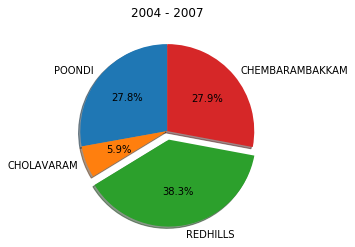

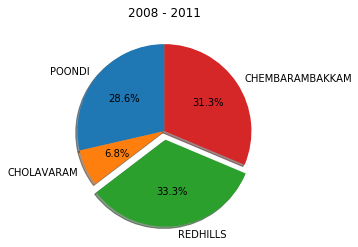

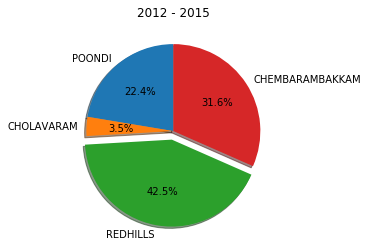

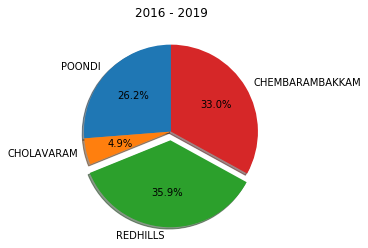

In [8]:
Length = res_levels.shape
Poondi = []
Chola = []
Redhills = []
Chem = []

x = []

step = int(Length[0]/4)
Length = res_levels.shape

palette = sns.color_palette("Spectral", 9).as_hex()
colors = ','.join(palette)

for i in range(0, Length[0], step):
    
    Poondi.append(res_levels.loc[i:i+step,'POONDI'].mean())
    Chola.append(res_levels.loc[i:i+step,'CHOLAVARAM'].mean())
    Redhills.append(res_levels.loc[i:i+step,'REDHILLS'].mean())
    Chem.append(res_levels.loc[i:i+step,'CHEMBARAMBAKKAM'].mean())        
x = ['2004 - 2007','2008 - 2011','2012 - 2015','2016 - 2019']

y1 = np.array(Poondi)
y2 = np.array(Chola)
y3 = np.array(Redhills)
y4 = np.array(Chem)
for i in range(4):
    res=[y1[i],y2[i],y3[i],y4[i]]
    labels = ['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']
    explode = (0, 0, 0.1, 0)
    # only "explode" the 2nd slice (i.e. 'Hogs') 
    fig1, ax1 = plt.subplots() 
    ax1.pie(res, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
    plt.title(x[i])
    plt.show() 


In [21]:
df = pd.read_csv('chennai_reservoir_levels.csv' , 
                 parse_dates=['Date'], 
                 dayfirst=True
                )
avg_water_avail = df.loc[ (df.Date.dt.month==3) & (df.Date.dt.day==1) ].mean().sum()
avg_water_avail
import plotly.express as px

fig = px.bar(df.loc[(df.Date.dt.month==3) & (df.Date.dt.day==1)],
       x='Date',
       y=['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'],
       title='Availablility of water in total at the begining of summer',
)
fig.add_hline(y=avg_water_avail,
              annotation_text=f"Avg. water availability {avg_water_avail:0.2f}", 
              annotation_font_color="black",
              annotation_font_size=20,
              line_color="blue",
              line_dash='dot')

In [14]:
df = pd.read_csv('chennai_reservoir_levels.csv' , 
                 parse_dates=['Date'], 
                 dayfirst=True
                )
import plotly.express as px

fig = px.bar(df.loc[(df.Date.dt.month==3) & (df.Date.dt.day==1)],
       x='Date',
       y=['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'],
       title='Availablility of water in total at the begining of summer',
)
fig